In [1]:
# EDA Packages
import pandas as pd
import numpy as np
import random


# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load Url Data 
urls_data = pd.read_csv("urldata.csv")

In [3]:
type(urls_data)

pandas.core.frame.DataFrame

In [4]:
urls_data.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [5]:
print(urls_data['url'])

0                                    https://www.google.com
1                                   https://www.youtube.com
2                                  https://www.facebook.com
3                                     https://www.baidu.com
4                                 https://www.wikipedia.org
                                ...                        
450171          http://ecct-it.com/docmmmnn/aptgd/index.php
450172    http://faboleena.com/js/infortis/jquery/plugin...
450173    http://faboleena.com/js/infortis/jquery/plugin...
450174                               http://atualizapj.com/
450175    http://writeassociate.com/test/Portal/inicio/I...
Name: url, Length: 450176, dtype: object


benign 345738
malicious 104438


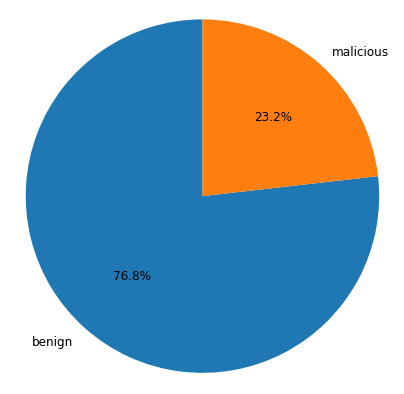

In [6]:
import matplotlib.pyplot as plt
def plot_pie(property):
    '''
    PIE GRAPH FUNCTION
    '''
    labels = urls_data[property].unique()
    values = []
    clean_labels = [x for x in labels if str(x) != 'nan']
    for i in clean_labels:
        values.append((urls_data[property]==i).sum())
        print(i, (urls_data[property]==i).sum())
        
    fig2, ax2 = plt.subplots(figsize=(7,7))
    ax2.pie(values, labels=clean_labels, autopct='%1.1f%%' ,radius=3.00, 
            textprops={'fontsize': 12}, rotatelabels=False, shadow=False, startangle=90)
    ax2.axis('equal')
    plt.show()
    
plot_pie('label')

In [7]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [8]:
Y = urls_data["label"]
x = urls_data['url']

In [9]:
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [10]:
X = vectorizer.fit_transform(x)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
logit = LogisticRegression()
logit.fit(X_train, Y_train)

C:\Users\kawad\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print("Accuracy ",logit.score(X_test, Y_test))

Accuracy  0.9950464258740948


In [14]:
X_predict = ["google.com/search=jcharistech",
"google.com/search=faizanahmad",
"pakistanifacebookforever.com/getpassword.php/", 
"www.radsport-voggel.de/wp-admin/includes/log.exe", 
"ahrenhei.without-transfer.ru/nethost.exe ",
"www.itidea.it/centroesteticosothys/img/_notes/gum.exe"]

In [15]:
X_predict = vectorizer.transform(X_predict)

print(logit.predict(X_predict))

['benign' 'benign' 'malicious' 'malicious' 'malicious' 'malicious']


In [22]:
import pickle
# Save the vectorizer
vec_file = 'vectorizer.pickle'
pickle.dump(vectorizer, open(vec_file, 'wb'))

# Save the model
mod_file = 'classification.model'
pickle.dump(logit, open(mod_file, 'wb'))

In [20]:
query = ["https://www.google.com"]
query = vectorizer.transform(query)
print(logit.predict(query))

['benign']


In [23]:
 # load the vectorizer
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))

# load the model
loaded_model = pickle.load(open('classification.model', 'rb'))
query = "facebook.com"
print(loaded_model.predict(loaded_vectorizer.transform([query])))

['malicious']
